# Исследование бизнес-показателей развлекательного приложения Procrastinate Pro+

Развлекательное приложение Procrastinate Pro+ на протяжении последних нескольких месяцев не приносит прибыли даже с учетом больших вложений в проведение рекламных компаний. Поэтому необходимо провести анализ различных бизнес-показателей, иллюстрирующих работу данного приложения, для того, чтобы выявить причины убыточной деятельности.


Для анализа представлены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:


- лог сервера с данными об их посещениях (файл visits_info_short.csv);
- выгрузка их покупок за этот период (файл orders_info_short.csv);
- рекламные расходы (файл costs_info_short.csv).

Необходимо изучить:


- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.


Работа будет выстроена следующим образом: сначала будет произведена **преодобработак данных**, после чего будет осуществлен **исследовательский анализ имеющихся данных**, в котором будут составлены профили пользователей, проанализирована информация о них в разрезе территориальной принадлежности, устройств, которыми они пользуются, каналов привлечения, далее будут проанализировано **проведение марекетинговых кампаний**, после чего будут **рассчитаны и проанализированы такие бизнес-показатели, характеризующие работу приложения с коммерческой точки зрения, а именно показатели LTV, ROI, удержания и конверсии**, по итогам работы будут сделаны **выводы о возможных причинах, мешающих приложению Procrastinate Pro+ приносить прибыль компании**.

### Загрука данных и их подготовка к анализу

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [2]:
sessions = pd.read_csv('/....csv')
orders = pd.read_csv('/....csv')
costs = pd.read_csv('/....csv')

#### Предобработака данных таблицы sessions

In [3]:
display(sessions.head())
sessions.tail()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Region,Device,Channel,Session Start,Session End
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04


In [4]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
sessions.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [6]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'])

In [7]:
sessions['session_end'] = pd.to_datetime(sessions['session_end'])

In [8]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [9]:
sessions['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [10]:
sessions['device'] = sessions['device'].str.lower()

In [11]:
sessions['channel'] = sessions['channel'].str.lower()

In [12]:
sessions.duplicated().sum()

0

#### Предобработака данных таблицы orders

In [13]:
display(orders.head())
orders.tail()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,User Id,Event Dt,Revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [15]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [16]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [18]:
sessions.duplicated().sum()

0

#### Предобработака данных таблицы costs

In [19]:
display(costs.head())
costs.tail()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


,dt,Channel,costs
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8
1799,2019-10-27,lambdaMediaAds,12.0


In [20]:
costs.columns = ['dt', 'channel', 'costs']

In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [22]:
costs['channel'] = costs['channel'].str.lower()

In [23]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [24]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [25]:
costs.duplicated().sum()

0

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии

In [26]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [27]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [28]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [29]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [30]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [31]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [32]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

**Прежде всего с использованием специальной функции get_profiles составим сборную таблицу профилей пользователей**

In [33]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [34]:
profiles = get_profiles(sessions, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,United States,2019-10-02,2019-10-01,False,0.230769


**Далее опеределяем максимальную и минмальную даты привлечения пользователей**

In [35]:
display(profiles['dt'].min())
profiles['dt'].max()

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

**Далее определим, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей**

In [36]:
profiles_per_region = (
    profiles.groupby(by='region').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by=['user_id'], ascending=False)
)

In [37]:
profiles_per_region.columns = ['user_id', 'dol_payer_user']
profiles_per_region

,user_id,dol_payer_user
region,,
United States,100002,0.069019
UK,17575,0.039829
France,17450,0.037994
Germany,14981,0.041119


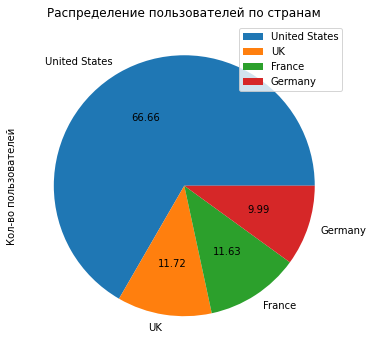

In [38]:
profiles_per_region.plot(y='user_id', kind='pie', autopct='%.2f', figsize=(6, 6), title='Распределение пользователей по странам', ylabel='Кол-во пользователей');

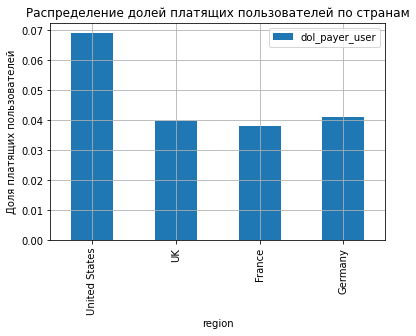

In [39]:
profiles_per_region.plot(y='dol_payer_user', kind='bar', figsize=(6, 4), sharex=False, grid=True, title='Распределение долей платящих пользователей по странам', ylabel='Доля платящих пользователей');

**Представленные диаграммы нагладно демонстрируют, что наибольшее количество пользователей (около 67 %) из США, максимальная доля платящих пользователей (6,9 %) также приходится на эту страну**

**Теперь выявим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи**

In [40]:
profiles_per_device = (
    profiles.groupby(by='device').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by=['user_id'], ascending=False)
)

In [41]:
profiles_per_device.columns = ['user_id', 'dol_payer_user_per_device']
profiles_per_device

,user_id,dol_payer_user_per_device
device,,
iphone,54479,0.062079
android,35032,0.058518
pc,30455,0.050468
mac,30042,0.063644


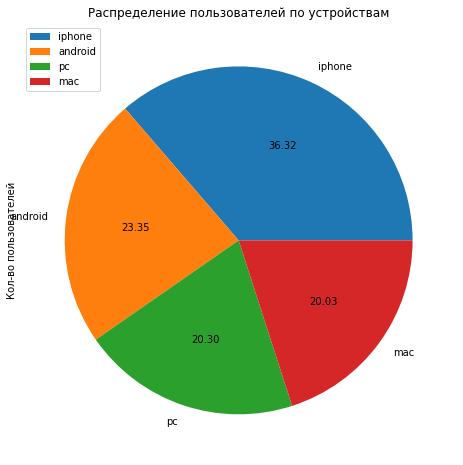

In [42]:
profiles_per_device.plot(y='user_id', kind='pie', autopct='%.2f', figsize=(8, 8), title='Распределение пользователей по устройствам', ylabel='Кол-во пользователей');

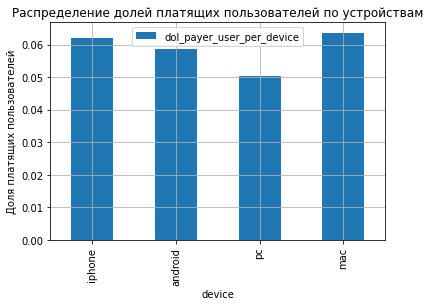

In [43]:
profiles_per_device.plot(y='dol_payer_user_per_device', kind='bar', figsize=(6, 4), sharex=False, grid=True, title='Распределение долей платящих пользователей по устройствам', ylabel='Доля платящих пользователей');

**Итак, большинство пользователей приложения устанавливают его на устройство типа iphone (36,3 %), однако именно платящие пользователи используют mac	(6,3 %), а также iphone (6,2 %)**

**Теперь изучим рекламные источники привлечения пользователй и определим каналы, из которых пришло больше всего платящих пользователей**

In [44]:
profiles_per_channel = (
    profiles.groupby(by='channel').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by=['user_id'], ascending=False)
)

In [45]:
profiles_per_channel.columns = ['user_id', 'dol_payer_user_per_channel']
profiles_per_channel

,user_id,dol_payer_user_per_channel
channel,,
organic,56439,0.020553
faceboom,29144,0.122049
tiptop,19561,0.096007
opplecreativemedia,8605,0.027077
leapbob,8553,0.030633
wahoonetbanner,8553,0.052964
rocketsuperads,4448,0.079137
mediatornado,4364,0.035747
yrabbit,4312,0.038265


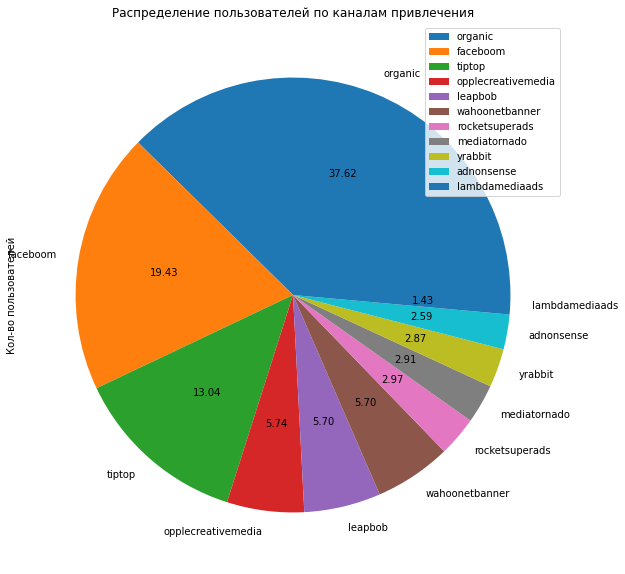

In [46]:
profiles_per_channel.plot(y='user_id', kind='pie', autopct='%.2f', figsize=(10, 10), title='Распределение пользователей по каналам привлечения', ylabel='Кол-во пользователей');

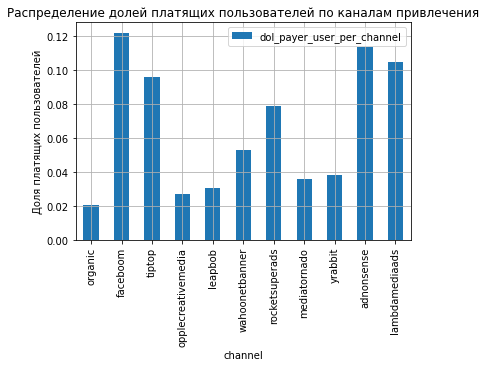

In [47]:
profiles_per_channel.plot(y='dol_payer_user_per_channel', kind='bar', figsize=(6, 4), sharex=False, grid=True, title='Распределение долей платящих пользователей по каналам привлечения', ylabel='Доля платящих пользователей');

**Таким образом, данные свидетельствуют о том, что большая часть пользователей приложения пришли в него самостоятельно (канал organic, 37,62 % от всех пользователей), если же говорить о канале поступления клиентов, в привлечение через который вложены средства компании, то среди них лидером является канал faceboom (19,43 % пользователей), наибольшее количество платящих же пользователей принести такие каналы, как faceboom, adnonsense, lambdamediaads (12, 11 и 10 % соответственно)**

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

**Для начала определеим, сколько всего средств компания направила на проведение маркетинговых кампаний в исследуемом периоде**

In [48]:
round(costs['costs'].sum(), 2)

105497.3

**Далее посмотрим, как траты распределены по рекламным источникам**

In [49]:
costs_per_channel = (
    costs.groupby(by='channel').agg({'costs':'sum'}).sort_values(by=['costs'], ascending=False)
)
costs_per_channel

,costs
channel,
tiptop,54751.30
faceboom,32445.60
wahoonetbanner,5151.00
adnonsense,3911.25
opplecreativemedia,2151.25
rocketsuperads,1833.00
leapbob,1797.60
lambdamediaads,1557.60
mediatornado,954.48


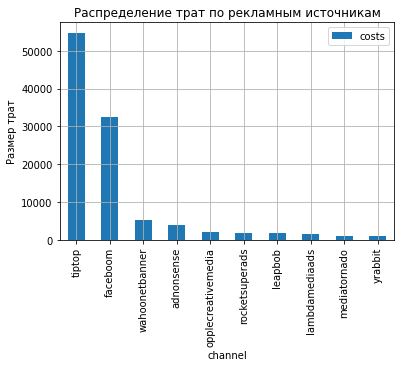

In [50]:
costs_per_channel.plot(y='costs', kind='bar', figsize=(6, 4), sharex=False, grid=True, title='Распределение трат по рекламным источникам', ylabel='Размер трат');

**Итак, почти половина всех рекламных средств вложена в привлечение пользователей через такой канал, как tiptop, лишь треть от всех средств направлена на канал faceboom (а ведь именно он стал лидером по количеству и привлеченных, и платящих пользователей)**

**Далее посмотрим на динамику изменения расходов на привлечение пользователей по каждому источнику по неделям и месяцам** 

In [51]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [52]:
costs['week'] = costs['dt'].dt.isocalendar().week

In [53]:
costs['month_1'] = costs['dt'].dt.month
costs.head()

,dt,channel,costs,week,month_1
0,2019-05-01,faceboom,113.3,18,5
1,2019-05-02,faceboom,78.1,18,5
2,2019-05-03,faceboom,85.8,18,5
3,2019-05-04,faceboom,136.4,18,5
4,2019-05-05,faceboom,122.1,18,5


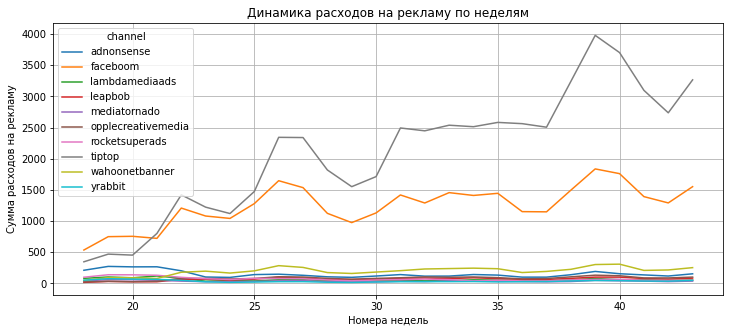

In [54]:
costs_week=costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(12, 5))
plt.xlabel('Номера недель')
plt.ylabel('Сумма расходов на рекламу')
plt.title('Динамика расходов на рекламу по неделям')
plt.show();

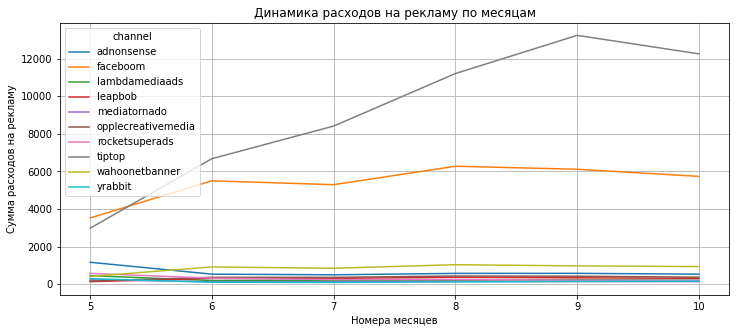

In [55]:
costs_month=costs.pivot_table(index='month_1', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(12, 5))
plt.xlabel('Номера месяцев')
plt.ylabel('Сумма расходов на рекламу')
plt.title('Динамика расходов на рекламу по месяцам')
plt.show();

**Представленные графики демонстрируют нам явное лидерство в финансировании двух каналов привлечения пользователей - tiptop	 и faceboom, вложения в которые на протяжении практически всего исследуемого периода стабильно возрастали и снизились совсем немного только к концу периода**

**Выясним, сколько в среднем стоило привлечение одного пользователя (CAC) для каждого источника**

In [56]:
acquisition_cost_per_channel=profiles.groupby(by='channel').agg({'acquisition_cost':'mean'}).sort_values(by=['acquisition_cost'], ascending=False)
acquisition_cost_per_channel

,acquisition_cost
channel,
tiptop,2.799003
faceboom,1.113286
adnonsense,1.008054
lambdamediaads,0.724802
wahoonetbanner,0.602245
rocketsuperads,0.412095
opplecreativemedia,0.250000
yrabbit,0.218975
mediatornado,0.218717


**Посмотрим на средний показатель САС в целом по всем пользователям**

In [84]:
acquisition_cost_mean=round(profiles['acquisition_cost'].mean(), 6)
acquisition_cost_mean

0.703278

**Итак, самый "дорогой" пользователь пришел через канал tiptop, что неудвительно, так как именно в этот канал было вложено больше всего рекламных средств (около 2,8), далее следуют пользователи с таких каналов, как faceboom и adnonsense (около 1), их размеры САС достаточно сильно отличаются от среднего САС по все данным о пользователях без группировки по каналам привлечения**

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Общая окупаемость рекламы (показатели LTV и ROI, графики динамики LTV, CAC и ROI)

In [57]:
observation_date = datetime(2019, 11, 1).date()

In [58]:
horizon_days = 14

In [59]:
profiles_filter = profiles.loc[profiles['channel']!='organic']

In [60]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filter, orders, observation_date, horizon_days
)

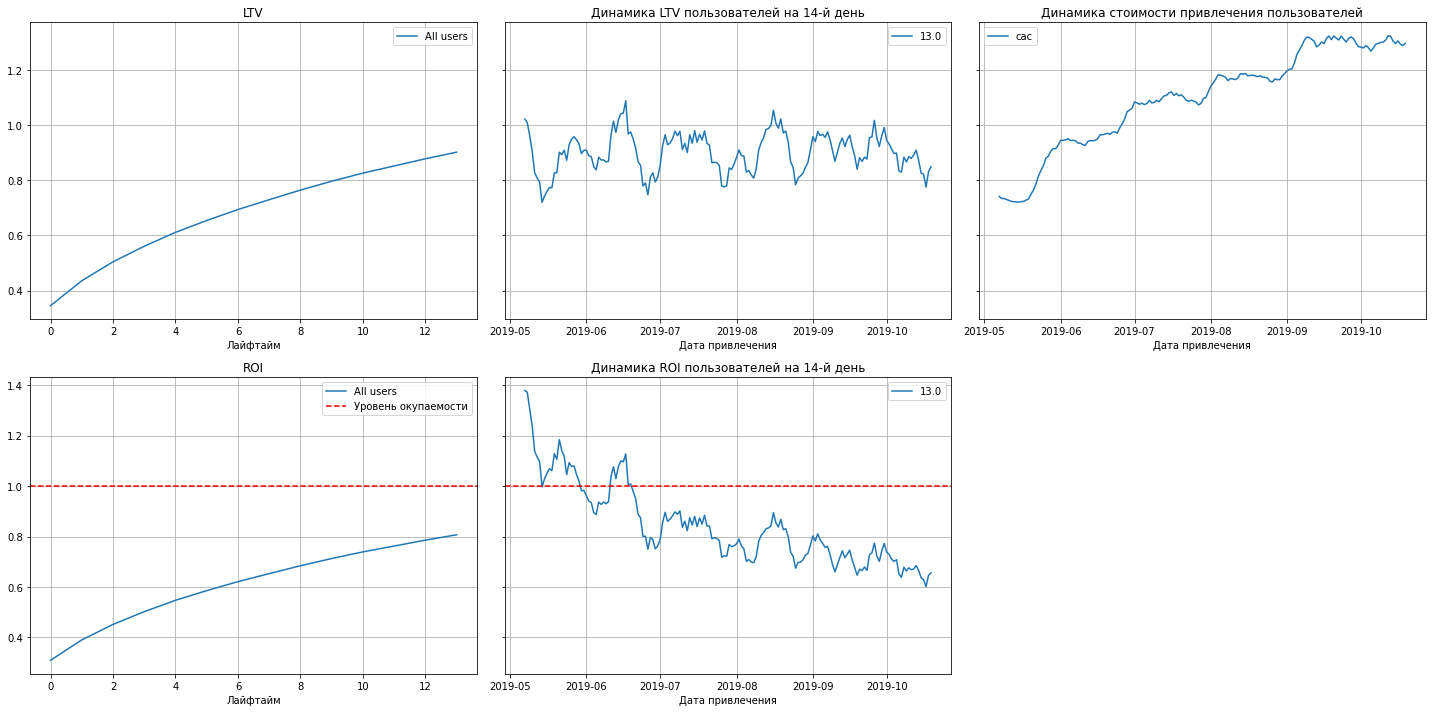

In [61]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Таким образом, если оценивать показатель LTV, то он достаточно стабилен, а вот расходы компании на рекламу постоянно возрастали, увеличивая тем самым стоимость привлечения одного пользователя, с учетом того, что, по-видимомму, количестов пользователей росло не пропорционально увеличению рекламного бюджета, этот факт подтвержадет и постепенное падение показателя ROI в динамике, а также тот факт, что кривая ROI не пересекла уровень окупаемости, что свидетельствует о том, что вложенные в рекламу средства не окупаются**

#### Окупаемость рекламы с разбивкой по устройствам

In [62]:
dimensions = ['device']

In [63]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filter, orders, observation_date, horizon_days, dimensions=dimensions
)

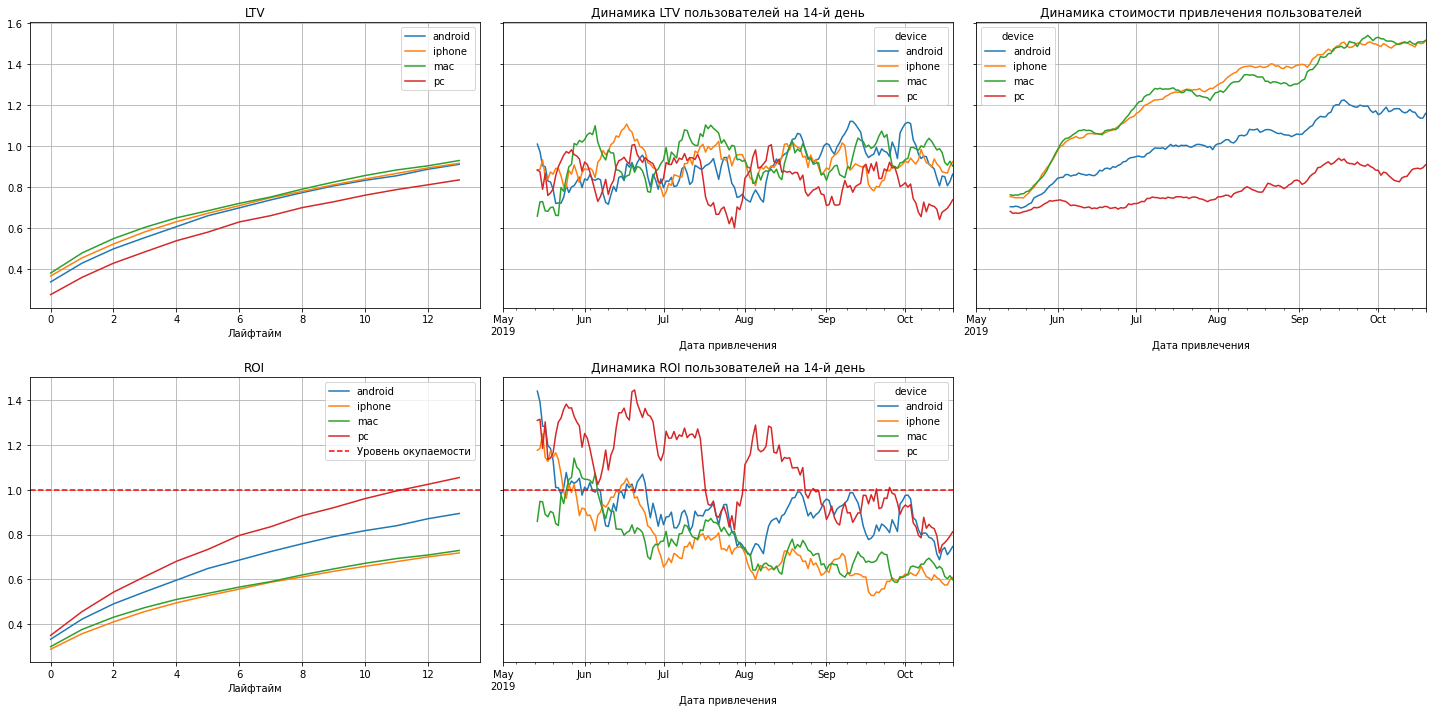

In [64]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Если же смотреть на окупаемость рекламных затрат в разрезе устройств, то здесь мы видим, что наибольшую стоимость на привлечение одного пользователя имеют пользователи с устройствами iphone и mac, и менно рекламные затраты на пользователей с этих устройств не превышают уровень окупаемости, судя по показателю ROI, который, кстати, в динамике за весь исследуемый период падает ниже, чем для пользователей с другими устройствами**

#### Окупаемость рекламы с разбивкой по странам

In [65]:
dimensions = ['region']

In [66]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filter, orders, observation_date, horizon_days, dimensions=dimensions
)

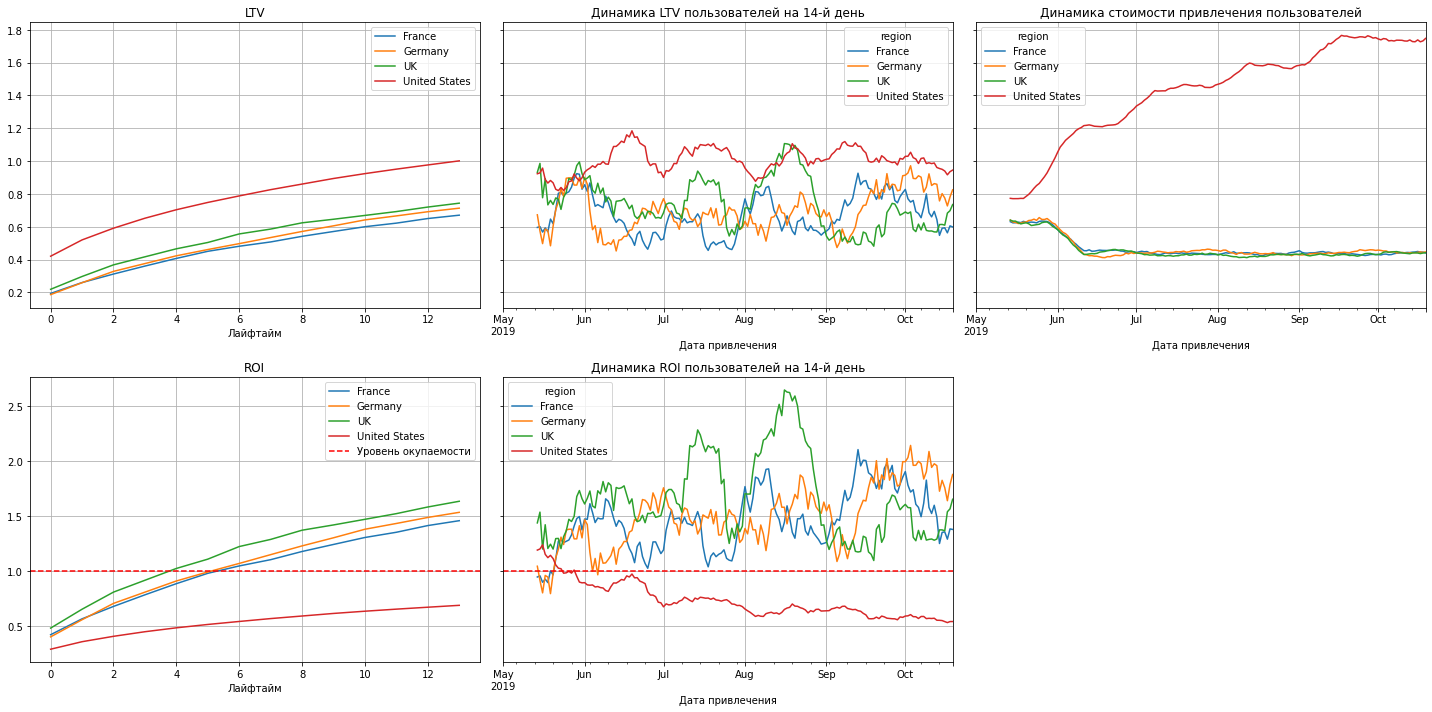

In [67]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Если же смотреть на окупаемость рекламных затрат по странам, то здесь в явных "аутсайдерах" идет США, возможно это связано с тем, что именно в этой стране большое количество пользователй именно с устройствами типа iphone и mac**

#### Окупаемость рекламы с разбивкой по рекламным каналам

In [68]:
dimensions = ['channel']

In [69]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filter, orders, observation_date, horizon_days, dimensions=dimensions
)

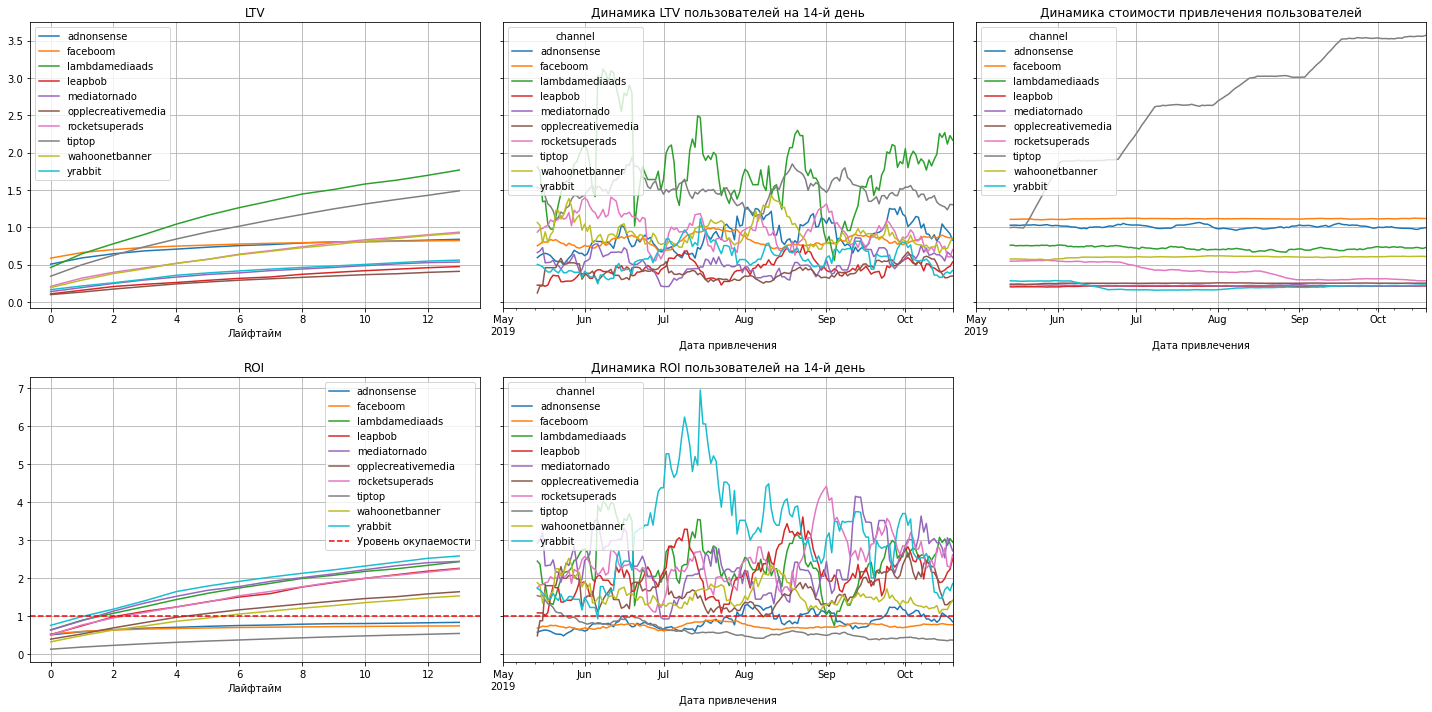

In [70]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Визуализация окупаемости рекламных средств по каналам наглядно демонстрирует выводы, которые пердставлены в разделах выше, о том, что большая часть рекламного бюджета, вложенная в привлечение клиентов по каналам tiptop  и faceboom, не окупаются, однако есть каналы, окупаемость которых достаточно высока, например такой канал, как yrabbit, возможно компании имеет смысл перенаправить средства рекламного бюджета на привлечение пользователй именно через этот канал**

#### Конверсия и удержание пользователей, динамика их изменения

In [71]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filter, orders, observation_date, horizon_days
)

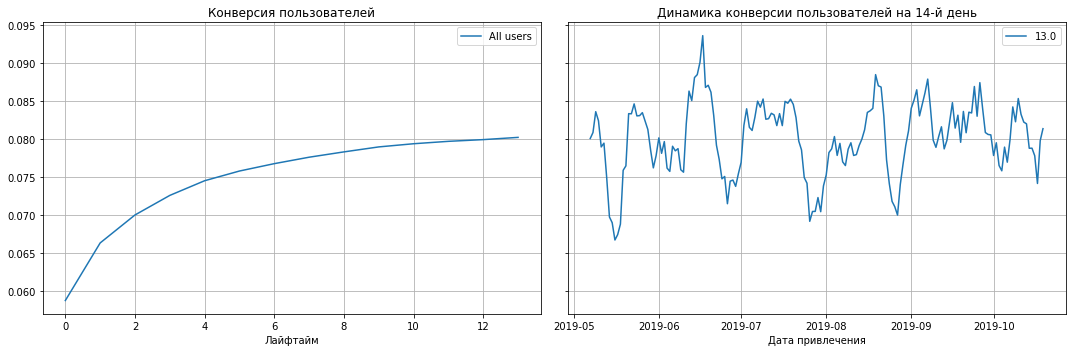

In [72]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

In [73]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filter, sessions, observation_date, horizon_days
)

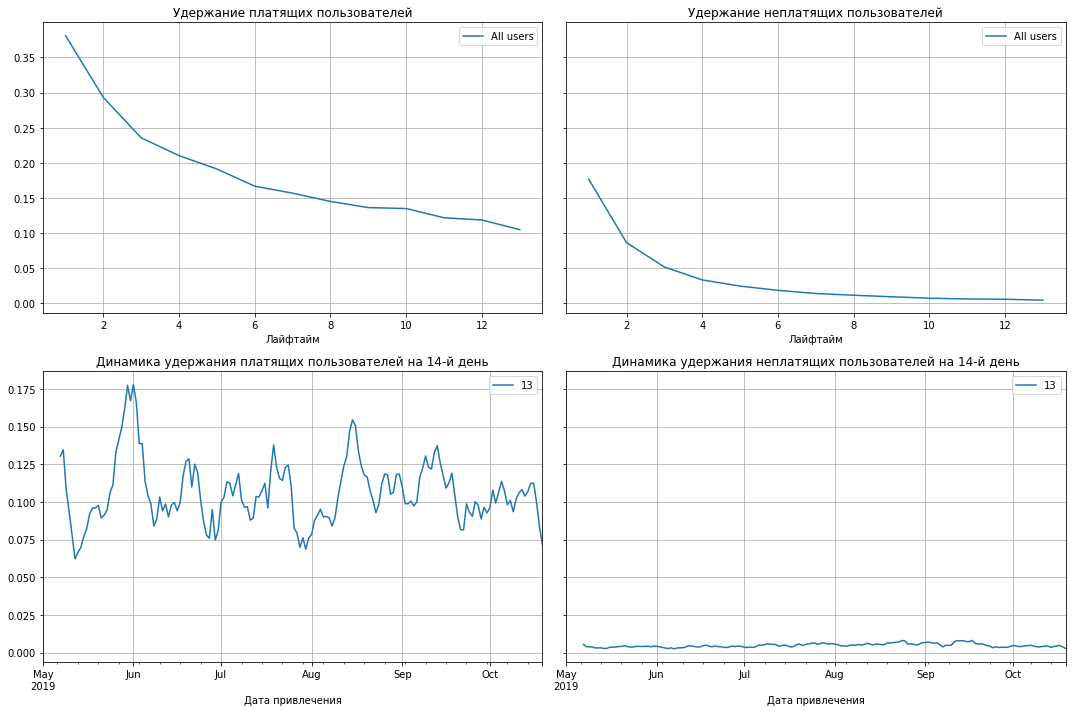

In [74]:
plot_retention(retention_grouped, retention_history, horizon_days) 

**В целом, показатели общей конверсии достаточно стабильны, поэтому рассмотрим ее в разрезе устройств и каналов**

In [75]:
dimensions = ['device']

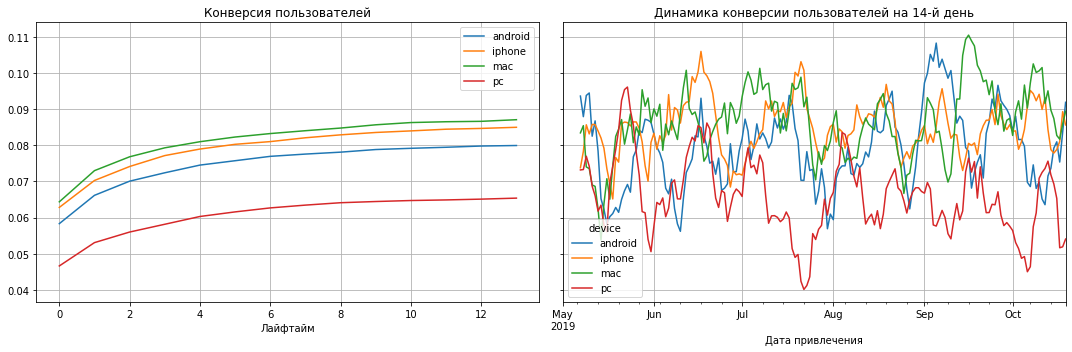

In [76]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filter, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

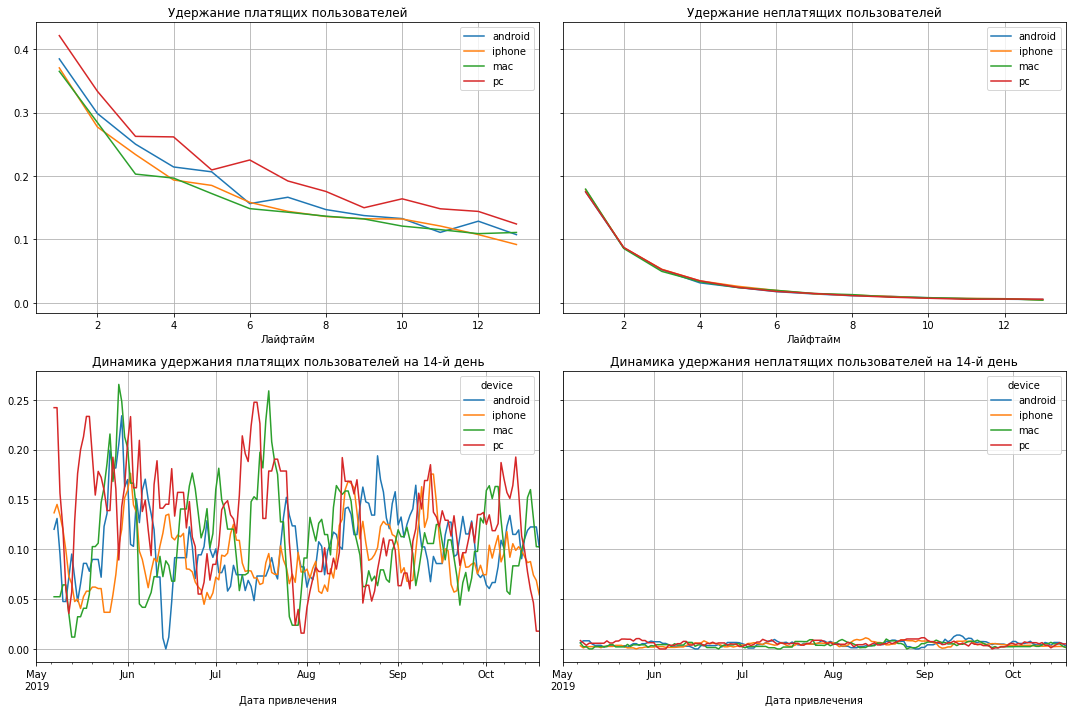

In [77]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filter, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Судя по графикам, конверсия у пользователей iphone и mac наиболее высока, однако уровень удержания клиентов наоборот ниже, чем на других устройствах**

In [78]:
dimensions = ['channel']

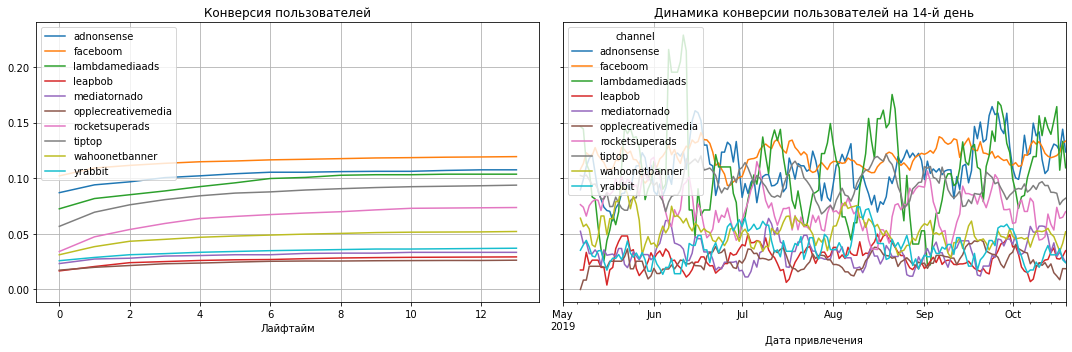

In [79]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filter, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

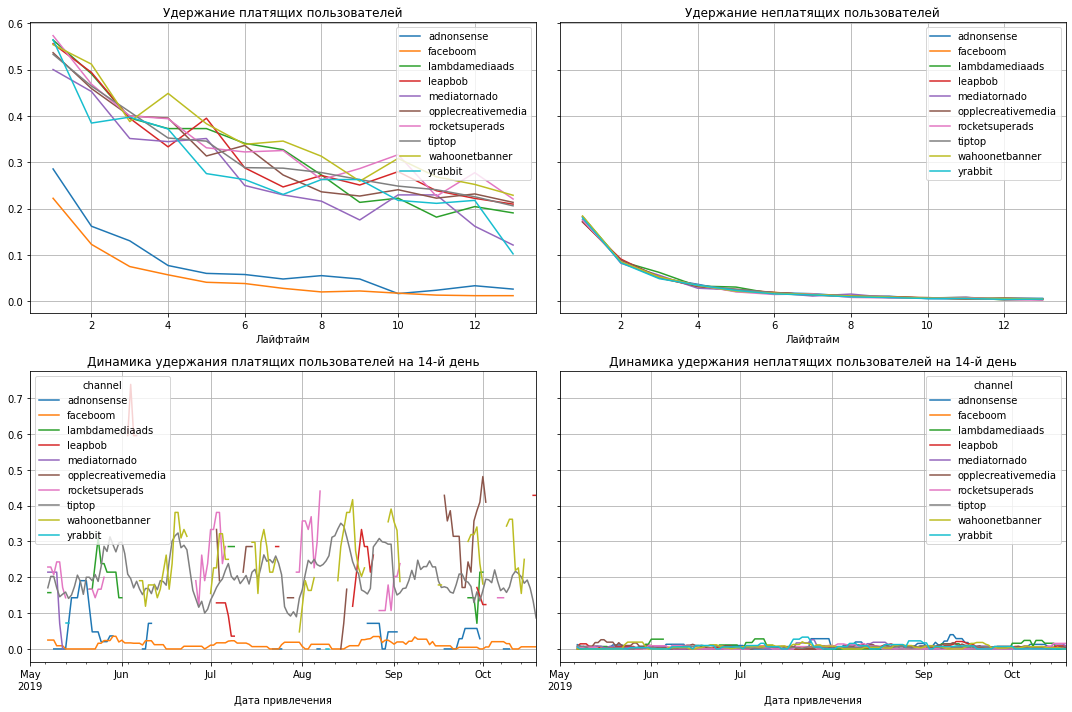

In [80]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filter, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**В разрезе каналов наиболее низкие показатели по удержанию клинтов у канала faceboom, второго, как мы помним, по сумме вложенных в него рекламных средств, что еще раз свидетельствует о том, что компании нужно перенаправить средства рекламного бюджета на привлечение пользователей через другие каналы, например такие как wahoonetbanner с достаточно высокими показателями доли привленченных и платящих пользователей, средним уровнем LTV, конверсии и достаточно высоким уровнем удержания пользователей, а также lambdamediaads  и yrabbit**

### Итоговые выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Итак, в описании задания к проекту была сформулирована следующая задача: необходимо провести анализ различных бизнес-показателей, иллюстрирующих работу развлекательного приложения Procrastinate Pro+, для того, чтобы выявить причины его убыточной деятельности на основе данных о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

С целью выявления причин сложившейся ситуации было произведено исследование различных коммерческих характеристик, оценивающих работу приложения Procrastinate Pro+, и выявлены следующие тенденции:

- наибольшее количество пользователей приложения (около 67 %) из США, максимальная доля платящих пользователей (6,9 %) также приходится на эту страну;

- большинство пользователей приложения устанавливают его на устройство типа iphone (36,3 %), однако именно платящие пользователи используют mac (6,3 %), а также iphone (6,2 %);

- большая часть пользователей приложения пришли в него самостоятельно (канал organic, 37,62 % от всех пользователей), если же говорить о канале поступления клиентов, в привлечение через который вложены средства компании, то среди них лидером является канал faceboom (19,43 % пользователей), наибольшее количество платящих же пользователей принести такие каналы, как faceboom, adnonsense, lambdamediaads (12, 11 и 10 % соответственно);

- почти половина всех рекламных средств вложена в привлечение пользователей через такой канал, как tiptop, лишь треть от всех средств направлена на канал faceboom (а ведь именно он стал лидером по количеству и привлеченных, и платящих пользователей);

- самый "дорогой" пользователь пришел через канал tiptop, что неудвительно, так как именно в этот канал было вложено больше всего рекламных средств (около 2,8), далее следуют пользователи с таких каналов, как faceboom и adnonsense (около 1).

В части анализа именно бизнес-показателей прибыльности и доходности, то здесь выявлены следующие тенденции:

- общий показатель LTV достаточно стабилен, а вот расходы компании на рекламу постоянно возрастали, увеличивая тем самым стоимость привлечения одного пользователя, с учетом того, что, по-видимомму, количество пользователей росло не пропорционально увеличению рекламного бюджета, этот факт подтвержадет и постепенное падение показателя ROI в динамике, а также тот факт, что кривая ROI не пересекла уровень окупаемости, что свидетельствует о том, что вложенные в рекламу средства не окупаются;

- окупаемость рекламных затрат в разрезе устройств показала, что наибольшую стоимость на привлечение одного пользователя имеют пользователи с устройствами iphone и mac, и менно рекламные затраты на пользователей с этих устройств не превышают уровень окупаемости, судя по показателю ROI, который, кстати, в динамике за весь исследуемый период падает ниже, чем для пользователей с другими устройствами;

- окупаемость рекламных затрат по странам показала, что здесь в явных "аутсайдерах" идет США, возможно это связано с тем, что именно в этой стране большое количество пользователй именно с устройствами типа iphone и mac;

- окупаемость рекламных средств по каналам наглядно демонстрирует, то, что большая часть рекламного бюджета, вложенная в привлечение клиентов по каналам tiptop и faceboom, не окупаются.

Таким образом, на основании всего вышеизложенного можно выдвинуть предположения о следующих причинах убыточной рекламной деятельности в продвижении развлекательного приложения Procrastinate Pro+:

- неэффективность избранных каналов привлечения пользователей, на которые направлена большая часть рекламного бюджета;
- возможно наличие какой-либо проблемы технического характера, препятствующей пользователям с устройствами типа iphone и mac полноценно использовать приложение.

Поэтому можно сформулировать следующие рекомендации по повышению эффективности использования средств рекламного бюджета:

- проверить и, в случае необходимости, усовершенствовать техническую составляющую для пользоватлей с устройтсвами типа iphone и mac;

- перераспределить средства рекламного бюджета и направиь их на продвижения приложения через более перспективные каналы, окупаемость которых достаточно высока, например такой канал, как yrabbit.